<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.12%20-%20Vanishing%20gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

2024-03-22 11:28:45.421766: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 11:28:45.471533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 11:28:45.471561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 11:28:45.473113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 11:28:45.480927: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 11:28:45.481641: I tensorflow/core/platform/cpu_feature_guard.cc:1

'2.15.0'

forward/back propagation calculations https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c

Vanishing gradient example: https://github.com/harinisuresh/VanishingGradient/blob/master/Vanishing%20Gradient%20Example.ipynb

https://adventuresinmachinelearning.com/vanishing-gradient-problem-tensorflow/

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_69211/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

%matplotlib inline

# Visualizing and understanding vanishing gradients

Make sure you understand well the backpropagation algorithm. You may perform by hand the calculations as illustrated [here](https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c) to consolidate your understanding.

We will be using three activation functions. Observe under which what values each function's gradient becomes negligible (very near zero)



### sigmoid

$$\text{sigm(z)} = \frac{1}{1-e^{-z}}$$

$$\frac{\partial \;\text{sigm}}{\partial \; z} = \text{sigm}(z)(1-\text{sigm}(z))$$


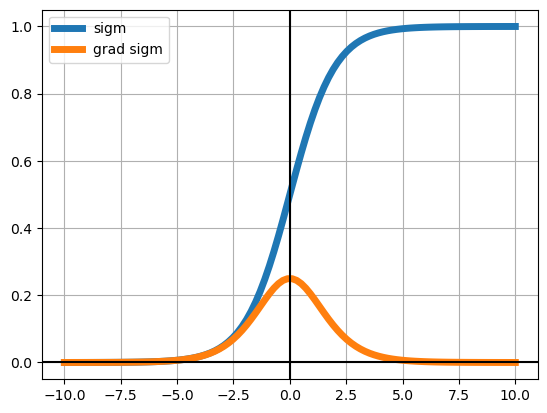

In [7]:
z = np.linspace(-10,10,100)

sigm = lambda z: 1/(1+np.exp(-z))

dsigm = lambda z: sigm(z)*(1-sigm(z))

plt.plot(z, sigm(z), lw=5, label="sigm")
plt.plot(z, dsigm(z), lw=5, label="grad sigm")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### tanh

$$\text{tanh(z)} = \frac{e^z - e^{-z}}{e^z-e^{-z}}$$

$$\frac{\partial \;\text{tanh}}{\partial \; z} = 1-\text{tanh}(z)^2$$


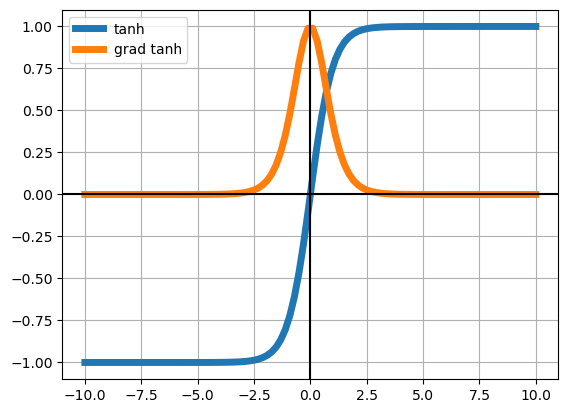

In [8]:
z = np.linspace(-10,10,100)

tanh = lambda z: (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

dtanh = lambda z: 1 - tanh(z)**2

plt.plot(z, tanh(z), lw=5, label="tanh")
plt.plot(z, dtanh(z), lw=5, label="grad tanh")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### ReLU (Rectified Linear Unit)

$$\text{relu}(z) = \text{z if }z<0\;;\;0\text{ otherwise}$$

$$\frac{\partial \;\text{relu}}{\partial \; z} = \text{1 if }z<0\;;\;0\text{ otherwise}$$


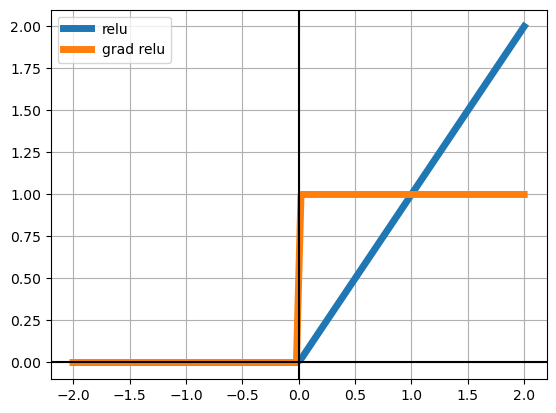

In [9]:
z = np.linspace(-2,2,100)

relu = np.vectorize(lambda z: z if z>0 else 0.)

drelu = np.vectorize(lambda z: 1 if z>0 else 0.)

plt.plot(z, relu(z), lw=5, label="relu")
plt.plot(z, drelu(z), lw=5, label="grad relu")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### Leaky ReLU (Rectified Linear Unit)

$$\text{relu}(z) = \text{z if }z<0\;;\;kz\text{ otherwise with }k<<1$$

$$\frac{\partial \;\text{relu}}{\partial \; z} = \text{1 if }z<0\;;\;k\text{ otherwise}$$


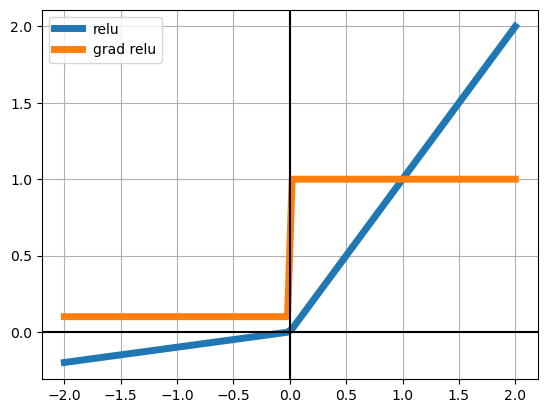

In [10]:
z = np.linspace(-2,2,100)

relu = np.vectorize(lambda z: z if z>0 else .1*z)

drelu = np.vectorize(lambda z: 1 if z>0 else .1)

plt.plot(z, relu(z), lw=5, label="relu")
plt.plot(z, drelu(z), lw=5, label="grad relu")
plt.grid(); 
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()

### load sample MNIST data as customary

In [5]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = X_train
X_test  = X_test
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(1200, 784) (1200, 10)


In [7]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras

### A basic multi layered dense model

observe that the function allows us to parametrize the number of hidden layers and their activation function


In [8]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

### SIGMOID activation

In [9]:
model = get_model(num_hidden_layers=10, activation="sigmoid")
!rm -rf log/sigmoid
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid', histogram_freq=1,  write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

2024-03-22 11:35:08.811593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 11:35:08.812541: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30
38/38 [==============================] - 3s 22ms/step - loss: 2.3775 - accuracy: 0.1192 - val_loss: 2.3527 - val_accuracy: 0.1433
Epoch 2/30
38/38 [==============================] - 0s 13ms/step - loss: 2.3365 - accuracy: 0.1192 - val_loss: 2.3249 - val_accuracy: 0.1433
Epoch 3/30
38/38 [==============================] - 1s 14ms/step - loss: 2.3177 - accuracy: 0.1192 - val_loss: 2.3094 - val_accuracy: 0.1433
Epoch 4/30
38/38 [==============================] - 0s 13ms/step - loss: 2.3089 - accuracy: 0.1192 - val_loss: 2.3028 - val_accuracy: 0.1433
Epoch 5/30
38/38 [==============================] - 1s 13ms/step - loss: 2.3047 - accuracy: 0.1192 - val_loss: 2.2976 - val_accuracy: 0.1433
Epoch 6/30
38/38 [==============================] - 0s 12ms/step - loss: 2.3021 - accuracy: 0.1192 - val_loss: 2.2954 - val_accuracy: 0.1433
Epoch 7/30
38/38 [==============================] - 1s 13ms/step - loss: 2.3012 - accuracy: 0.1192 - val_loss: 2.2942 - val_accuracy: 0.1433
Epoch 8/30
38

### RELU activation

In [10]:
model = get_model(num_hidden_layers=10, activation="relu")
!rm -rf log/relu
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/relu', histogram_freq=1,  write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Epoch 1/30
38/38 [==============================] - 3s 21ms/step - loss: 2.2969 - accuracy: 0.1033 - val_loss: 2.2764 - val_accuracy: 0.1033
Epoch 2/30
38/38 [==============================] - 0s 13ms/step - loss: 2.2385 - accuracy: 0.1217 - val_loss: 2.1841 - val_accuracy: 0.1333
Epoch 3/30
38/38 [==============================] - 1s 17ms/step - loss: 2.1145 - accuracy: 0.1842 - val_loss: 2.0705 - val_accuracy: 0.1767
Epoch 4/30
38/38 [==============================] - 0s 13ms/step - loss: 1.9945 - accuracy: 0.2050 - val_loss: 2.0278 - val_accuracy: 0.1400
Epoch 5/30
38/38 [==============================] - 0s 12ms/step - loss: 1.8852 - accuracy: 0.2192 - val_loss: 1.9590 - val_accuracy: 0.1700
Epoch 6/30
38/38 [==============================] - 0s 12ms/step - loss: 1.7676 - accuracy: 0.2342 - val_loss: 1.9523 - val_accuracy: 0.2033
Epoch 7/30
38/38 [==============================] - 0s 12ms/step - loss: 1.6899 - accuracy: 0.2642 - val_loss: 1.9055 - val_accuracy: 0.2600
Epoch 8/30
38

### Leaky RELU activation

In [11]:
import tensorflow as tf
model = get_model(num_hidden_layers=10, activation=tf.nn.leaky_relu)
!rm -rf log/leaky_relu
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/leaky_relu', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Epoch 1/30
38/38 [==============================] - 3s 20ms/step - loss: 2.2954 - accuracy: 0.1350 - val_loss: 2.2714 - val_accuracy: 0.2300
Epoch 2/30
38/38 [==============================] - 0s 12ms/step - loss: 2.1473 - accuracy: 0.2142 - val_loss: 2.0472 - val_accuracy: 0.1833
Epoch 3/30
38/38 [==============================] - 0s 13ms/step - loss: 1.9497 - accuracy: 0.1958 - val_loss: 1.8997 - val_accuracy: 0.2000
Epoch 4/30
38/38 [==============================] - 0s 13ms/step - loss: 1.8743 - accuracy: 0.2042 - val_loss: 1.8226 - val_accuracy: 0.2367
Epoch 5/30
38/38 [==============================] - 0s 13ms/step - loss: 1.7887 - accuracy: 0.2133 - val_loss: 1.7740 - val_accuracy: 0.2367
Epoch 6/30
38/38 [==============================] - 0s 12ms/step - loss: 1.7322 - accuracy: 0.2317 - val_loss: 1.7622 - val_accuracy: 0.2667
Epoch 7/30
38/38 [==============================] - 0s 13ms/step - loss: 1.6749 - accuracy: 0.2600 - val_loss: 1.6645 - val_accuracy: 0.3167
Epoch 8/30
38

### SIGMOID activation but longer run (epochs)

In [12]:
model = get_model(num_hidden_layers=10, activation="sigmoid")
!rm -rf log/sigmoid_longrun
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid_longrun', histogram_freq=1, write_graph=True, write_images=True)
model.fit(X_train, y_train_oh, epochs=300, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

Epoch 1/300
38/38 [==============================] - 3s 21ms/step - loss: 2.3313 - accuracy: 0.0925 - val_loss: 2.3057 - val_accuracy: 0.0900
Epoch 2/300
38/38 [==============================] - 0s 13ms/step - loss: 2.3135 - accuracy: 0.1183 - val_loss: 2.2964 - val_accuracy: 0.1433
Epoch 3/300
38/38 [==============================] - 1s 14ms/step - loss: 2.3065 - accuracy: 0.1192 - val_loss: 2.2930 - val_accuracy: 0.1433
Epoch 4/300
38/38 [==============================] - 0s 13ms/step - loss: 2.3029 - accuracy: 0.1192 - val_loss: 2.2921 - val_accuracy: 0.1433
Epoch 5/300
38/38 [==============================] - 0s 12ms/step - loss: 2.3020 - accuracy: 0.1192 - val_loss: 2.2922 - val_accuracy: 0.1433
Epoch 6/300
38/38 [==============================] - 0s 13ms/step - loss: 2.3010 - accuracy: 0.1192 - val_loss: 2.2928 - val_accuracy: 0.1433
Epoch 7/300
38/38 [==============================] - 0s 12ms/step - loss: 2.3009 - accuracy: 0.1192 - val_loss: 2.2931 - val_accuracy: 0.1433
Epoch 

## Experiment observations

- What is the distribution of the gradients observed as we move from the output layer to the input layer for each experiment? 

- Might need to run for [Tensorboard](http://localhost:6006) to run:

      pip install --upgrade grpcio

- Look in [Tensorboard](http://localhost:6006) at distributions or histograms charts named `Layer_00_Input/kernel_0_grad`, `Layer_01_Hidden/kernel_0_grad`, etc. for different layers. You should see:
    - Gradients are usually higher at the output layer and tend to decrease as you move backwards in the network.
    - With sigmoid activations gradients are always low and rapidly decay from the output layer all the way to the input layer.
    - Relu might still have some vanishing gradient when weights are <0.
    - Leaky Relu would probably have constant gradients across layers.
    

- Recall that, in the backpropagation algorithm, the gradient of the loss function $L$ with respect to the weights at a certain layer $W_l$ is proportional to the derivatives and the weights of previous layers:

$$\frac{\partial L}{\partial W_l} \propto f'(z^{(l)})\cdot W_l \cdot f'(z^{(l+1)})\cdot W_{l+1} \cdot f'(z^{(l+2)})\cdot W_{l+2}...$$

where $f'$ is the derivative of the activation function and $z^{(l)}$ is the output at layer $l$.

- Do you think the sigmoid longrun would reach levels comparable to Relu or Leaky Relu? At what computational cost?




## Tensorboard in Colab


In [13]:
try:
    %load_ext tensorboard
    %tensorboard --logdir log

except:
    print ("not in colab")

## **En vscode o jupyter notebook**

In [14]:
%tensorboard --logdir logs